## Before you start :
   - These exercises are related to the Exploratory data analysis using matplotlib and seaborn.
   - The datasets for Challenge 2 and 3 are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

# Challenge 1

Answer all questions by drawing a graph. Then explain.

In [10]:
import seaborn as sns

**0. Load seaborn dataset "tips"**

In [11]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**1. What is the prefered day for eating?**

In [12]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<AxesSubplot:xlabel='day', ylabel='count'>

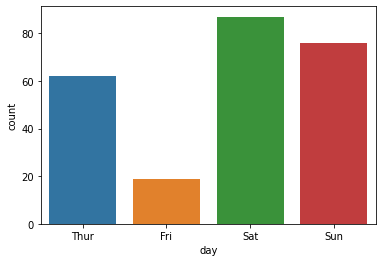

In [13]:
sns.countplot(x="day", data=tips)

**2. What days of the week has more men than women payers?**

<AxesSubplot:xlabel='day', ylabel='count'>

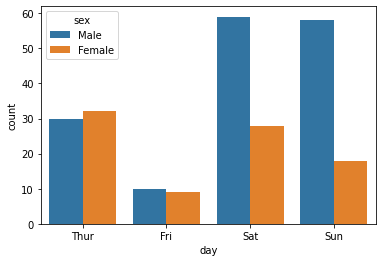

In [14]:
sns.countplot(x=tips.day, hue=tips.sex)

**3. Do you think bill amounts change considerably depending on smoking?**

In [20]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

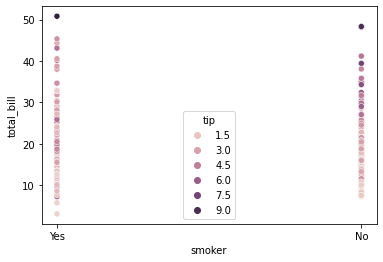

In [23]:
sns.scatterplot(x="smoker", y="total_bill", hue="tip", data=tips)

**4. Is tip correlated to total_bill? Draw a scatter plot**

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

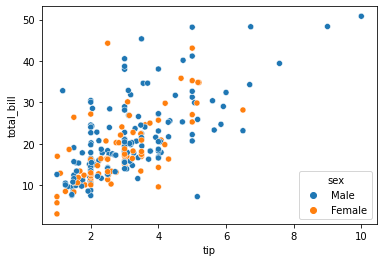

In [24]:
sns.scatterplot(x="tip", y="total_bill", hue="sex", data=tips)

**BONUS**: Draw a graph of your choice with 2 numerical variables and 2 categorical variable (HINT: use `hue` and `style`). Do you find it useful?